# This is a collection of python examples for 
# Numerical Optimization (Prof. Dr. Volker Schulz)

# chapter 2 SVM example code

In [2]:
%matplotlib
# from scikit learn documentation
#
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs, make_classification


# we create 50 separable points in blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=3)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='rbf', C=0.3)

# create not nicely separable points
X, y = make_classification(n_samples=50,n_features=2, n_redundant=0, n_informative=2,
                            n_clusters_per_class=1,random_state=10)
#clf = svm.SVC(kernel='rbf', C=0.01)
#choose from ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, 

clf.fit(X, y)

# after being fitted, the model can then be used to predict new values:
print(clf.predict([[-6, -2]]))
print(clf.predict([[-2, -1]]))
print(clf.predict([[2, 1]])) 
print(clf.predict([[5, 6]])) 


plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
 
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


Using matplotlib backend: TkAgg
[0]
[1]
[0]
[0]


/home/klar/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## chapter 2 3D pic for SVM illustration

In [15]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

s2=np.sqrt(2.0)

L, n = 2.5, 400
x = np.linspace(-L, L, n)
y = x.copy()
X, Y = np.meshgrid(x, y)


# Compute random points
N = 100
rho = np.random.rand(N)
phi = 2 * np.pi * np.random.rand(N)
xb = rho * np.cos(phi)
yb = rho * np.sin(phi)
rho = np.random.rand(N)+1.5
phi = 2 * np.pi * np.random.rand(N)
xr = rho * np.cos(phi)
yr = rho * np.sin(phi)


# Set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(xb, yb, 'bo',
        xr, yr, 'ro')
ax.grid(True)
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X*X, Y*Y, s2*X*Y, rstride=20, cstride=20, cmap=cm.hot, alpha=0.25)
ax.scatter(xb*xb, yb*yb, s2*xb*yb, color = 'blue')
ax.scatter(xr*xr, yr*yr, s2*xr*yr, color = 'red')

plt.show()

Using matplotlib backend: TkAgg


## chapter 3  illustration of convergence speeds

/Users/volkerschulz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys


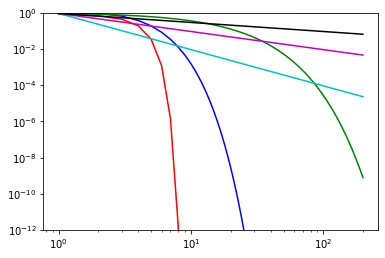

In [3]:
from numpy import *
import math
import matplotlib.pyplot as plt

Max = 200
t = range(1, Max)
a = 0.9**(power(2,t))        # quadratic       red
b=ones(size(t))
b[0]=0.9
for k in range(1, Max-1):
    b[k] = b[k-1]/sqrt(k)    # superlinear     blue
c = power(0.9,t)             # linear          green
d = 0.9/(power(t,2))         # sublinear 2     cyan 
e = [0.9/k for k in t]       # sublinear 1     magenta
f = 0.9/sqrt(t)              # sublinear 1/2   black

#plt.xscale("log")
#plt.yscale("log")
plt.ylim(10**(-12), 1)
plt.plot(t, a, 'r') 
plt.plot(t, b, 'b')  
plt.plot(t, c, 'g')  
plt.plot(t, d, 'c')  
plt.plot(t, e, 'm')  
plt.plot(t, f, 'k') 
plt.show()